# Third Practice ML
In this practice, we will learn about **logistic regression** and **MLP**.  
We will learn about **Kaggle** and how to use it.  
## Kaggle  
![kaggle-logo-transparent-300 (1)](https://user-images.githubusercontent.com/41818563/98548217-e743ee80-22a1-11eb-9fa4-12032e612e24.png)  
Link: https://www.kaggle.com/  
A platform for ML (Machine Learning) and DL (Deep Learning) Competitions.  
It has Courses, Competitions, Datasets and much more.  
It is a good place for Data Scientists to start and sharpen their skills in real-world problems (with a lot of help from the community of Kaggle).  

### Competitions  
Link: https://www.kaggle.com/competitions  
There are competitions in many areas of ML (CV (Computer Vision), etc.) and many topics of real-world problems (Health, Business, Energy, Historical, etc.).  
Some of the competitions have a high prize pool (hundred of thousands of dollars) and some are just for knowledge.  

### Datasets  
Link: https://www.kaggle.com/datasets  
There are a lot of datasets in Kaggle, in every area of life.  
Users can publish their datasets and let others use it in their projects.  
You can also keep a dataset private for your use.  
Datasets can be anything from pictures to audio files or CSV files or even trained models and python packages.  

### Notebooks  
Link: https://www.kaggle.com/notebooks  
Kaggle is providing an internet Jupiter Notebook platform with [GPU (Graphics Processing Unit)](https://en.wikipedia.org/wiki/Graphics_processing_unit) and [TPU (Tensor Processing Unit)](https://en.wikipedia.org/wiki/Tensor_Processing_Unit).  
Kaggle Notebooks connects naturally to Kaggle Datasets and any available dataset can be an input to the notebooks.  

### Discussion  
Link: https://www.kaggle.com/discussion
There is a big community of Data Scientists, ML Developers, DL Developers, and Professionals from every aspect of ML.  
There is a big support for people that are new to the field, and even experienced ML Researchers can find new ideas and points of view in these forums.  

### Courses  
Link: https://www.kaggle.com/learn/overview  
Kaggle courses can help you grasp the idea of ML conveniently and easily.  The Courses are short and well guided, with some theory and a lot of practice.  
In a few hours, one can enter a new field in ML and start getting experience with the competitions on the site.   

## Imports and Definitions

In [ ]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

## Data Investigation and Preprocessing
We use the [Iris Plants Dataset](https://scikit-learn.org/stable/datasets/index.html?highlight=boston%20housing%20price#iris-plants-dataset) in this practice for the classification task.   

In [ ]:
# print sklearn data description
def print_sklearn_data_description(data_dict):
    print('DESCR', f'len: {len(data_dict["DESCR"])}', f'type: {type(data_dict["DESCR"])}', data_dict["DESCR"], sep='\n')

# get df from sklearn data
def get_df_from_sklearn_data(data_dict, target_column_name):
    df = pd.DataFrame(data=data_dict['data'], columns=data_dict['feature_names'])
    df[target_column_name] = data_dict['target']
    return df

In [ ]:
# print iris data description
iris_data = datasets.load_iris()
print_sklearn_data_description(iris_data)

DESCR
len: 2782
type: <class 'str'>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ==============

We can also show the description of this dataset in a more nice and beautiful way by using Markdown and display functions of the IPython.display module

In [ ]:
from IPython.display import display, Markdown
display(Markdown(iris_data['DESCR']))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

In [ ]:
# display iris data df
iris_df = get_df_from_sklearn_data(iris_data, 'class')
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The iris data is data with 150 samples.  
Each sample corresponds to one iris flower.  
![flower-iris-siberian-flag-gard](https://user-images.githubusercontent.com/41818563/95992434-9d005680-0e36-11eb-997e-3fe5cf98db58.jpg)  
There are three types of iris flowers:  
1. Setosa
2. Versicolour
3. Virginica  
![irispetalsepa](https://user-images.githubusercontent.com/41818563/95992844-1304bd80-0e37-11eb-988c-c64d9deacec5.png)  

Every flower has a few types of leaves. Two of them are:
1. Sepal
2. Petal  

In the data, we have the height and width of the sepal and petal of each flower.  
![irispetalsepalengthwidth](https://user-images.githubusercontent.com/41818563/95993158-6f67dd00-0e37-11eb-8594-a6328fba7ea7.png)  
The height is the long dashed line and the width is the short line.  
We need to classify each flower based on these values.  
Let's plot the connection between sepal width and length based on the flower type.   


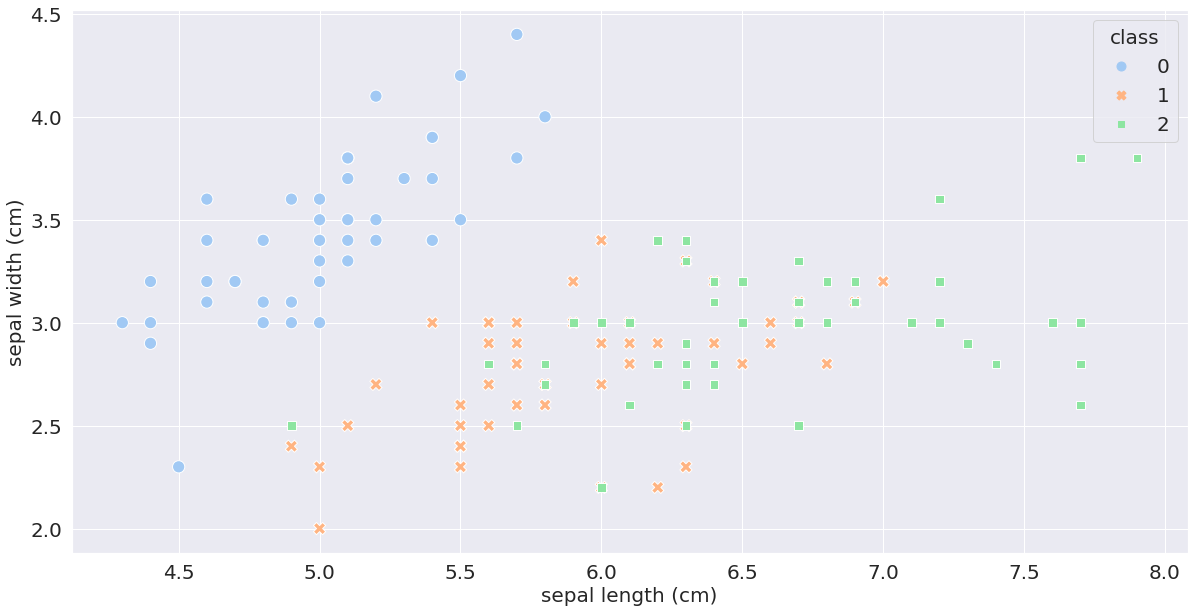

In [ ]:
# show scatterplot of sepal length and sepal width
plt.figure(figsize=(20,10))
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="class", style='class', palette='pastel', s=150)

We can see that class 0's sepal is generally wider than classes 1 and 2.  
We can also see that the longest sepal of samples is from class 2.  
Let's see how petal length differs between classes.  

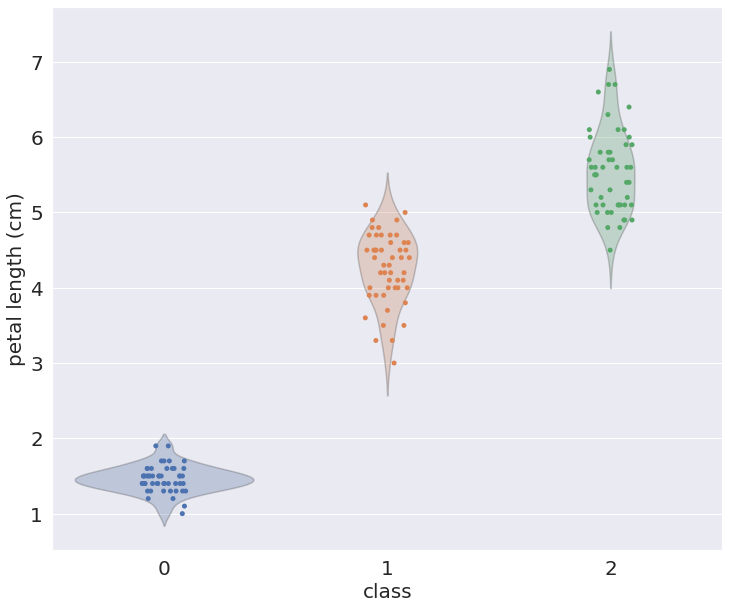

In [ ]:
# violinplot and stripplot of petal length by class
plt.figure(figsize=(12,10))
ax = sns.violinplot(x="class", y="petal length (cm)", data=iris_df, inner=None)
plt.setp(ax.collections, alpha=.3)
sns.stripplot(x="class", y="petal length (cm)", data=iris_df)

There is a big difference between the classes.  
Class 0's petal length is short compared to classes 1 and 2.  
Also, class 0 samples are closer to each other (in terms of petal length) than class 1 or class 2.  
Let's see the correlation between all the features.  

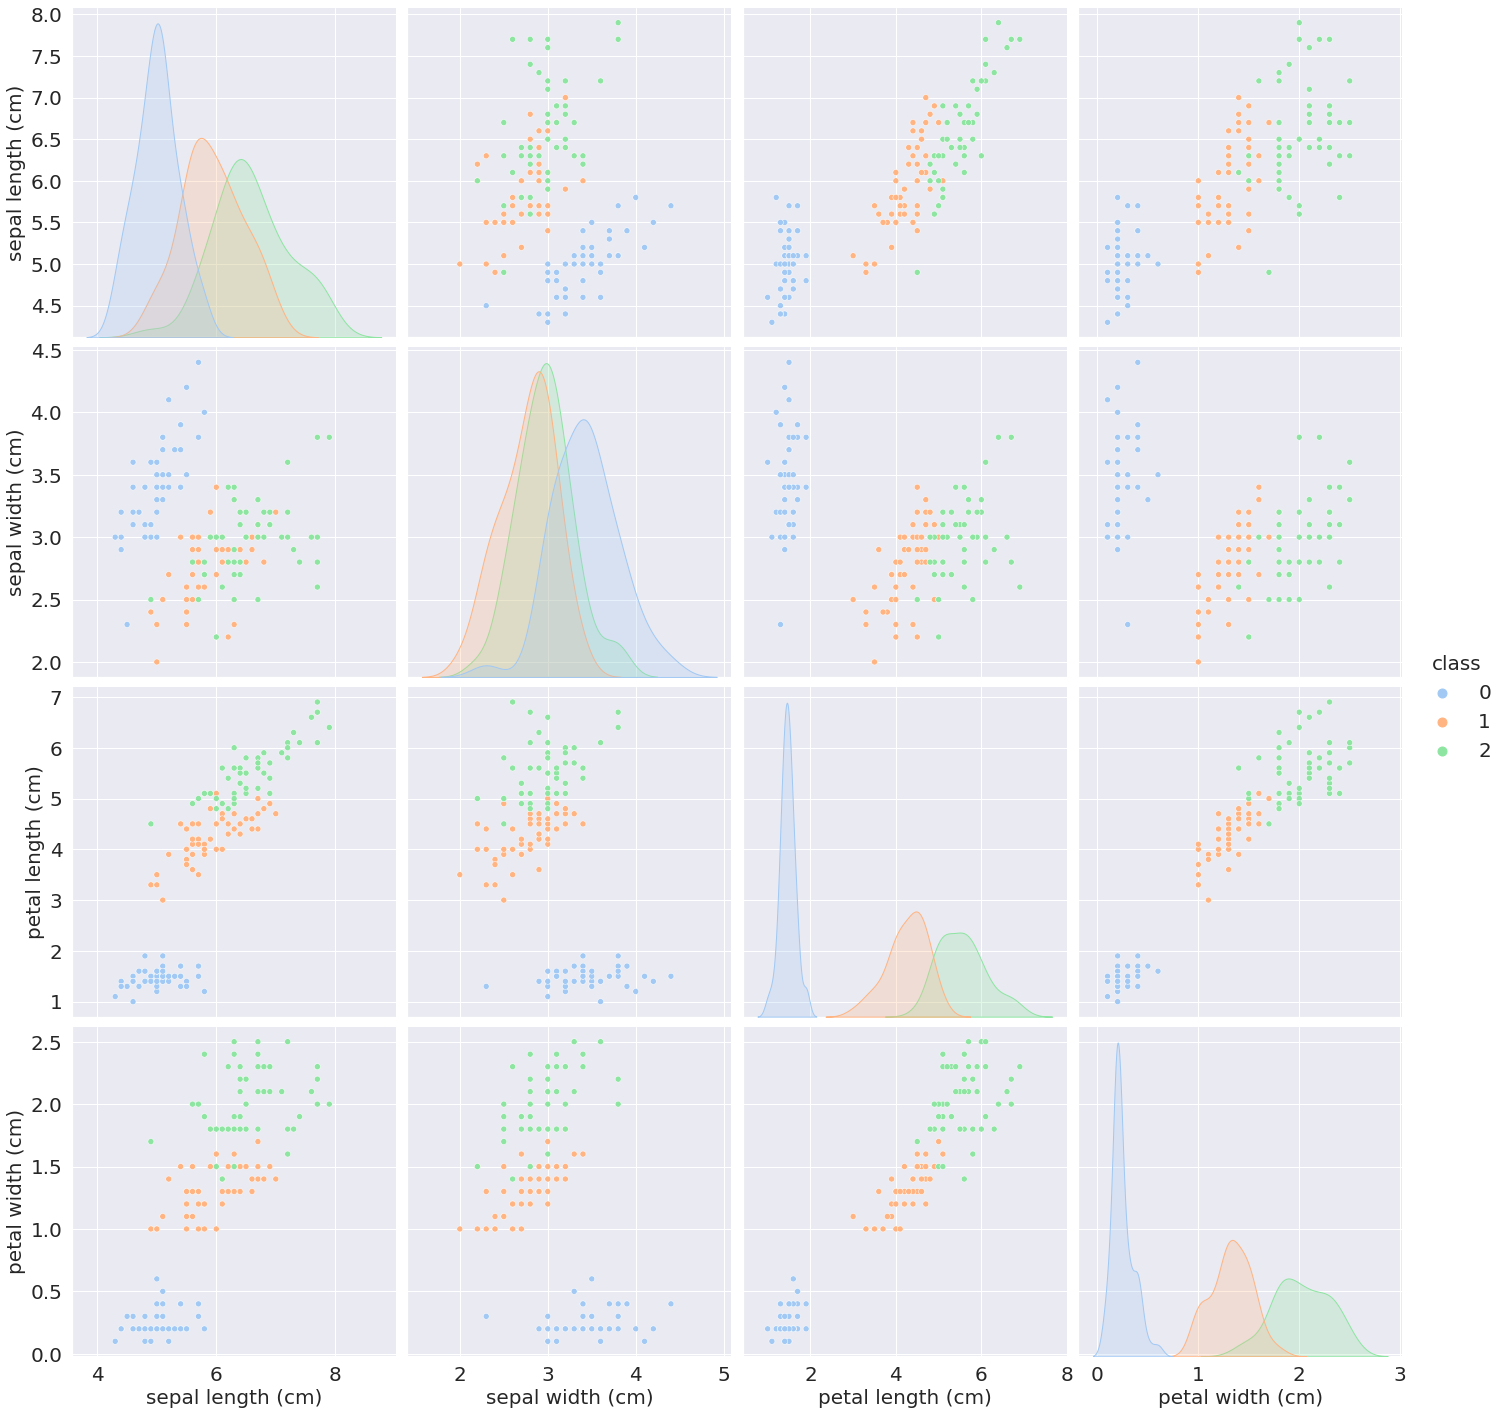

In [ ]:
# show pairplot of the features
sns.pairplot(data=iris_df, hue="class", palette='pastel', height=5)

We can see that class 0 is very distinctive compared to classes 1 and 2.  
We can also see that petal length and petal width are closely related.  
When the petal length is small, the petal width is also small and vice versa.  
The same thing can not be said about the sepal.  
Let's check the correlation.  

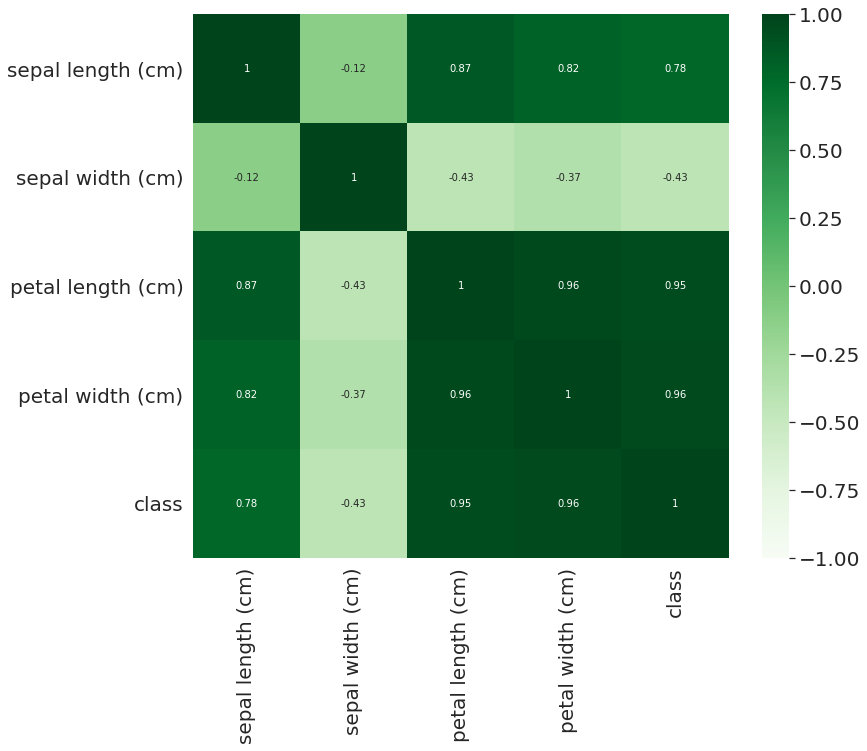

In [ ]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = iris_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

The class feature has a high correlation with petal width and petal length.  
We can try to add a computed feature calculated with `petal size = petal width * petal length`.  

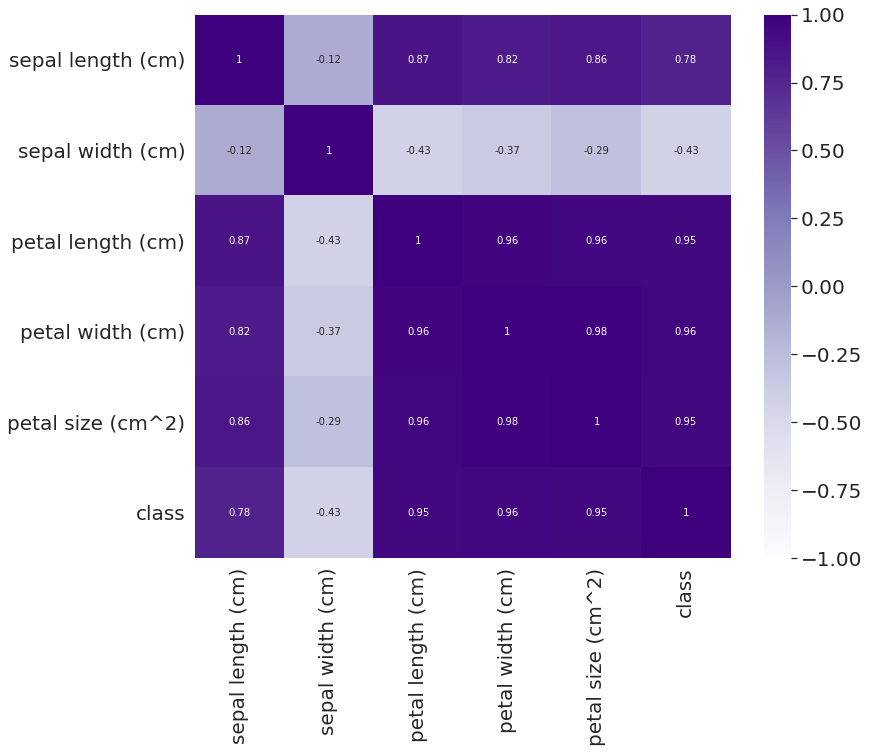

In [ ]:
# show absolute correlation between features (with the new size feature) in a heatmap
iris_df_cp = iris_df.copy()
iris_df_cp.insert(4, 'petal size (cm^2)', iris_df_cp['petal length (cm)'] * iris_df_cp['petal width (cm)'])

plt.figure(figsize=(12,10))
cor = iris_df_cp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples, vmin=-1, vmax=1)
plt.show()

The new feature - petal size, is very correlated with the class.  
We will compare the two dataframes, with the new feature and without it, to see if it helped to get better predictions.  
First, let's split the data.  

In [ ]:
# split the data to 80% train and 20% test
t = iris_df['class']
X = iris_df.drop('class', axis=1)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

## Classification
We can use 2 ways to classify the data based on logistic regression:  
1. The Optimizer - [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) (When using `log` loss)  
2. The Estimator - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  

But, The Scikit-learn LogisticRegression estimator does not have a pure GD (or pure SGD) optimizer (in the Scikit-learn variables it is called `solver`).  
It has a few other solvers that some of them are based on SGD.  
You are encouraged to check them in the exercises.  
For now, we will use SGDClassifier with log-loss.  
To understand why we use the log-loss function instead of MSE and how we do the classification, we need to understand what is a [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):  
![an-illustration-of-the-signal-](https://user-images.githubusercontent.com/41818563/98540004-e73df180-2295-11eb-904f-f4940c2026b4.png)  
This function values are in range `(0, 1)`.  
When we apply it to classification, zero means that the item `x` is not from the class and one means that it is from the class.  
The values between them mean how much the model is confident in its decision.  
In classification, instead of `x`, we put `z`, and by `z` we mean the original linear hypothesis from linear regression:  
![images](https://user-images.githubusercontent.com/41818563/98540600-dfcb1800-2296-11eb-893a-92fdbddcc2d0.png)  
So, we take this hypothesis and apply a sigmoid function to it get a confident number in range `(0, 1)`, and we get our new logistic regression hypothesis.  
Now, we want to use a loss function, that will give us the same [delta rule](https://en.wikipedia.org/wiki/Delta_rule) as the MSE.  
This is [CE (Cross-Entropy)](https://en.wikipedia.org/wiki/Cross_entropy) loss:  
![1_gnup7pn6sc42vaywvoamma (1)](https://user-images.githubusercontent.com/41818563/98547544-02622e80-22a1-11eb-80a4-0b1e32cab6fd.png)  
In the equation above, *p* is the original labels of the data, and *q* is the approximate label that is the output of the hypothesis.  
When we use it on multiple classes (like in our case, we have 3 classes), we use the OVA (One Versus All) approach.  
It means that we train 3 different classifiers, one for each class.  
When we try to predict the class of a new sample, we run the three classifiers on the sample and return the sample with the lowest loss value.  

In [ ]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[7.78183024e-03 4.00045305e-01 5.92172865e-01]
 [8.39913152e-01 1.59833020e-01 2.53828347e-04]
 [2.25085729e-01 6.68536826e-01 1.06377445e-01]
 [7.03569032e-03 3.33788428e-02 9.59585467e-01]
 [1.15898770e-01 4.81166847e-01 4.02934384e-01]]

first 5 predictions of y_train:
[2 0 1 2 1]

first 5 probabilities of y_test_prob:
[[8.72079703e-01 1.27845530e-01 7.47665715e-05]
 [7.46224438e-01 2.53719938e-01 5.56239229e-05]
 [1.84747934e-03 4.34235900e-01 5.63916621e-01]
 [6.95113779e-01 3.04852299e-01 3.39216981e-05]
 [8.55344333e-01 1.44567681e-01 8.79860190e-05]]

first 5 predictions of y_test:
[0 0 2 0 0]


The `score` function in Scikit-learn SGDClassifier is the mean accuracy for each label.  
The accuracy is defined as the ratio between the number of correct predictions and all the predictions (it means, how correct the model is).  
![formula-to-calculate-accuracy (1)](https://user-images.githubusercontent.com/41818563/96045277-6a784d00-0e7a-11eb-832c-d403e09fb051.png)  
The accuracy values are in range `[0, 1]`.  
The highest the score, the better the model.  

In [1]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.9166666666666666
Accuracy score on test 0.9

CE on train 0.32570748452898
CE on test 0.3678572804084124


Let's check the results of the dataframe with the additional feature.

In [ ]:
# calculate accuracy and CE loss of the new dataframe (with the additional feature) train and test 
t_cp = iris_df_cp['class']
X_cp = iris_df_cp.drop('class', axis=1)
X_train_cp, X_test_cp, t_train_cp, t_test_cp = sklearn.model_selection.train_test_split(X_cp, t_cp, test_size=0.2, random_state=2)
SGD_cls_cp = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train_cp, t_train_cp)
y_train_prob_cp = SGD_cls_cp.predict_proba(X_train_cp)
y_test_prob_cp = SGD_cls_cp.predict_proba(X_test_cp)
print('Accuracy score on train', SGD_cls_cp.score(X_train_cp, t_train_cp))
print('Accuracy score on test', SGD_cls_cp.score(X_test_cp, t_test_cp))
print()
print('CE on train', metrics.log_loss(t_train_cp, y_train_prob_cp))
print('CE on test', metrics.log_loss(t_test_cp, y_test_prob_cp))

Accuracy score on train 0.95
Accuracy score on test 0.9

CE on train 0.24535201647104687
CE on test 0.293793850221902


The accuracy score of the train is higher, and the CE loss of both train and test, are lower.  
We can say that the additional feature helped our model to recognize the classes better.  

Another way of getting more features is by using [NN](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) (Neural Networks).  
In our case, we will use Scikit-learn [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) (MLP is Multi-layer Perceptron).  
It is a neural network that looks something like that:  
![Webp net-resizeimage (4)](https://user-images.githubusercontent.com/41818563/96048462-5420c000-0e7f-11eb-8b06-9dc9afcfa841.png)  
In the middle, there can be any number of layers.  
From the left side, we push the input features, and from the right side, we are getting our result (In our case the classification result).  
The more layers, the more calculated features there are for the model to learn.  
Neural Networks are transforming features into other features.  
The new feature dimension can be bigger or smaller than the original dimension.  
If we want to keep the original features in addition to the new features, we need to do something called bypass (you will learn more about it in the NN class).
We need to be careful not to get to overfitting (too many features can cause that).  

In [ ]:
# import neural_network and run MLP on the data
from sklearn import neural_network
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.9833333333333333
Accuracy score on test 0.9666666666666667

CE on train 0.32867907366436716
CE on test 0.28699428942757105


Let's check the results of the dataframe with the additional feature.

In [ ]:
# calculate accuracy and CE loss of the new dataframe (with the additional feature) train and test (with MLP)
MLP_cls_cp = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train_cp, t_train_cp)
y_train_prob_cp = MLP_cls_cp.predict_proba(X_train_cp)
y_test_prob_cp = MLP_cls_cp.predict_proba(X_test_cp)
print('Accuracy score on train', MLP_cls_cp.score(X_train_cp, t_train_cp))
print('Accuracy score on test', MLP_cls_cp.score(X_test_cp, t_test_cp))
print()
print('CE on train', metrics.log_loss(t_train_cp, y_train_prob_cp))
print('CE on test', metrics.log_loss(t_test_cp, y_test_prob_cp))

Accuracy score on train 0.9666666666666667
Accuracy score on test 0.9666666666666667

CE on train 0.1818332295995718
CE on test 0.16852978005183372


The CE loss is smaller in both test and train, but the accuracy score didn't get higher.  
We have a bit of improvement, but it is small because we already created a lot of features with the MLP, and adding a few more won't be crucial for the model's prediction.  

## More Information 
Explanation of binary cross-entropy (log loss):  
[Understanding binary cross-entropy / log loss: a visual explanation](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) 

Wikipedia on Multilayer Perceptron:  
[Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)  

Explanation on Multilayer Perceptron:  
[Multi-Layer Perceptron (MLP)](https://medium.com/@xzz201920/multi-layer-perceptron-mlp-4e5c020fd28a)  

Explanation of the differences between MSE and log-loss for Logistic Regression:  
[Why not Mean Squared Error(MSE) as a loss function for Logistic Regression?](https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c)  

Explanation of the derivative of the log-loss function:  
[The Derivative of Cost Function for Logistic Regression](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)  

Wikipedia on Entropy in Information Theory:  
[Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))  

A blog post on Neural Networks and their connection to linear and logistic regressions:  
[Understanding objective functions in neural networks.](https://towardsdatascience.com/understanding-objective-functions-in-neural-networks-d217cb068138)  